# Keltner Channel

In [22]:
import pandas as pd
from pandas import DatetimeIndex
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import math
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
my_year_month_fmt = mdates.DateFormatter('%m/%y')
plt.rcParams['figure.figsize'] = (15, 9)
%matplotlib inline
import pandas_datareader as web
import datetime
import talib

In [2]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2020, 1, 1)
amzn_df = web.DataReader('AMZN', 'yahoo', start, end)

In [3]:
amzn_df.tail(20)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-03,1772.869995,1747.229980,1760.000000,1769.959961,3380900,1769.959961
2019-12-04,1789.089966,1760.219971,1774.010010,1760.689941,2670100,1760.689941
2019-12-05,1763.500000,1740.000000,1763.500000,1740.479980,2823800,1740.479980
2019-12-06,1754.400024,1740.130005,1751.199951,1751.599976,3117400,1751.599976
2019-12-09,1766.890015,1745.609985,1750.660034,1749.510010,2442800,1749.510010
2019-12-10,1750.670044,1735.000000,1747.400024,1739.209961,2514300,1739.209961
2019-12-11,1750.000000,1735.709961,1741.670044,1748.719971,2097600,1748.719971
2019-12-12,1764.000000,1745.439941,1750.000000,1760.329956,3095900,1760.329956
2019-12-13,1768.989990,1755.000000,1765.000000,1760.939941,2745700,1760.939941


In [4]:
ema_20= amzn_df.ewm(span=20, adjust=False).mean()
ema_20.tail(20)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-03,1784.122924,1759.682379,1773.207057,1773.585217,2.920069e+06,1773.585217
2019-12-04,1784.595976,1759.733578,1773.283529,1772.357096,2.896262e+06,1772.357096
2019-12-05,1782.586835,1757.854190,1772.351764,1769.321180,2.889361e+06,1769.321180
2019-12-06,1779.902377,1756.166172,1770.337306,1767.633446,2.911079e+06,1767.633446
2019-12-09,1778.663104,1755.160821,1768.463280,1765.907405,2.866481e+06,1765.907405
2019-12-10,1775.997099,1753.240743,1766.457256,1763.364791,2.832940e+06,1763.364791
2019-12-11,1773.521185,1751.571145,1764.096569,1761.970046,2.762908e+06,1761.970046
2019-12-12,1772.614405,1750.987220,1762.754039,1761.813847,2.794621e+06,1761.813847
2019-12-13,1772.269223,1751.369390,1762.967940,1761.730618,2.789962e+06,1761.730618


In [7]:
amzn_df['ema20']=ema_20['Close']
amzn_df.tail(20)

,High,Low,Open,Close,Volume,Adj Close,ema20
Date,,,,,,,
2019-12-03,1772.869995,1747.229980,1760.000000,1769.959961,3380900,1769.959961,1773.585217
2019-12-04,1789.089966,1760.219971,1774.010010,1760.689941,2670100,1760.689941,1772.357096
2019-12-05,1763.500000,1740.000000,1763.500000,1740.479980,2823800,1740.479980,1769.321180
2019-12-06,1754.400024,1740.130005,1751.199951,1751.599976,3117400,1751.599976,1767.633446
2019-12-09,1766.890015,1745.609985,1750.660034,1749.510010,2442800,1749.510010,1765.907405
2019-12-10,1750.670044,1735.000000,1747.400024,1739.209961,2514300,1739.209961,1763.364791
2019-12-11,1750.000000,1735.709961,1741.670044,1748.719971,2097600,1748.719971,1761.970046
2019-12-12,1764.000000,1745.439941,1750.000000,1760.329956,3095900,1760.329956,1761.813847
2019-12-13,1768.989990,1755.000000,1765.000000,1760.939941,2745700,1760.939941,1761.730618


In [25]:
# Count ATR by using 14 days
amzn_df['ATR']=talib.ATR(amzn_df['High'],amzn_df['Low'],amzn_df['Close'],timeperiod=14)
amzn_df.tail(20)

,High,Low,Open,Close,Volume,Adj Close,ema20,ATR
Date,,,,,,,,
2019-12-03,1772.869995,1747.229980,1760.000000,1769.959961,3380900,1769.959961,1773.585217,26.600113
2019-12-04,1789.089966,1760.219971,1774.010010,1760.689941,2670100,1760.689941,1772.357096,26.762247
2019-12-05,1763.500000,1740.000000,1763.500000,1740.479980,2823800,1740.479980,1769.321180,26.529230
2019-12-06,1754.400024,1740.130005,1751.199951,1751.599976,3117400,1751.599976,1767.633446,25.653572
2019-12-09,1766.890015,1745.609985,1750.660034,1749.510010,2442800,1749.510010,1765.907405,25.341176
2019-12-10,1750.670044,1735.000000,1747.400024,1739.209961,2514300,1739.209961,1763.364791,24.650381
2019-12-11,1750.000000,1735.709961,1741.670044,1748.719971,2097600,1748.719971,1761.970046,23.910356
2019-12-12,1764.000000,1745.439941,1750.000000,1760.329956,3095900,1760.329956,1761.813847,23.528192
2019-12-13,1768.989990,1755.000000,1765.000000,1760.939941,2745700,1760.939941,1761.730618,22.846892


In [27]:
amzn_df['Upper bond']=amzn_df['ema20']+2*amzn_df['ATR']
amzn_df['Lower bond']=amzn_df['ema20']-2*amzn_df['ATR']
amzn_df.tail(20)

,High,Low,Open,Close,Volume,Adj Close,ema20,ATR,Upper bond,Lower bond
Date,,,,,,,,,,
2019-12-03,1772.869995,1747.229980,1760.000000,1769.959961,3380900,1769.959961,1773.585217,26.600113,1826.785443,1720.384992
2019-12-04,1789.089966,1760.219971,1774.010010,1760.689941,2670100,1760.689941,1772.357096,26.762247,1825.881590,1718.832601
2019-12-05,1763.500000,1740.000000,1763.500000,1740.479980,2823800,1740.479980,1769.321180,26.529230,1822.379639,1716.262721
2019-12-06,1754.400024,1740.130005,1751.199951,1751.599976,3117400,1751.599976,1767.633446,25.653572,1818.940589,1716.326303
2019-12-09,1766.890015,1745.609985,1750.660034,1749.510010,2442800,1749.510010,1765.907405,25.341176,1816.589756,1715.225053
2019-12-10,1750.670044,1735.000000,1747.400024,1739.209961,2514300,1739.209961,1763.364791,24.650381,1812.665552,1714.064030
2019-12-11,1750.000000,1735.709961,1741.670044,1748.719971,2097600,1748.719971,1761.970046,23.910356,1809.790759,1714.149334
2019-12-12,1764.000000,1745.439941,1750.000000,1760.329956,3095900,1760.329956,1761.813847,23.528192,1808.870231,1714.757463
2019-12-13,1768.989990,1755.000000,1765.000000,1760.939941,2745700,1760.939941,1761.730618,22.846892,1807.424402,1716.036834


In [36]:
amzn_df.dropna(axis=0,how='any',inplace=True)
amzn_df.head(20)

,High,Low,Open,Close,Volume,Adj Close,ema20,ATR,Upper bond,Lower bond
Date,,,,,,,,,,
2014-01-23,406.170013,397.790009,401.000000,399.869995,3025400,399.869995,399.008553,8.098570,415.205692,382.811413
2014-01-24,400.200012,387.269989,398.160004,387.600006,4458400,387.600006,397.922024,8.443673,414.809371,381.034677
2014-01-27,394.100006,380.489990,390.500000,386.279999,3936800,386.279999,396.813260,8.812698,414.438656,379.187864
2014-01-28,394.739990,387.119995,387.399994,394.429993,2894500,394.429993,396.586282,8.787505,414.161291,379.011273
2014-01-29,392.850006,383.239990,392.160004,384.200012,3382300,384.200012,395.406637,8.959112,413.324861,377.488414
2014-01-30,406.250000,387.700012,393.769989,403.010010,10473900,403.010010,396.130768,9.894174,415.919116,376.342420
2014-01-31,375.450012,357.760010,371.760010,358.690002,16154800,358.690002,392.564981,12.419590,417.404161,367.725800
2014-02-03,360.850006,340.100006,358.980011,346.149994,10280800,346.149994,388.144506,13.014620,414.173745,362.115267
2014-02-04,354.000000,344.019989,349.589996,347.950012,4812900,347.950012,384.316459,12.797862,409.912182,358.720735


Text(0, 0.5, 'Price in $')

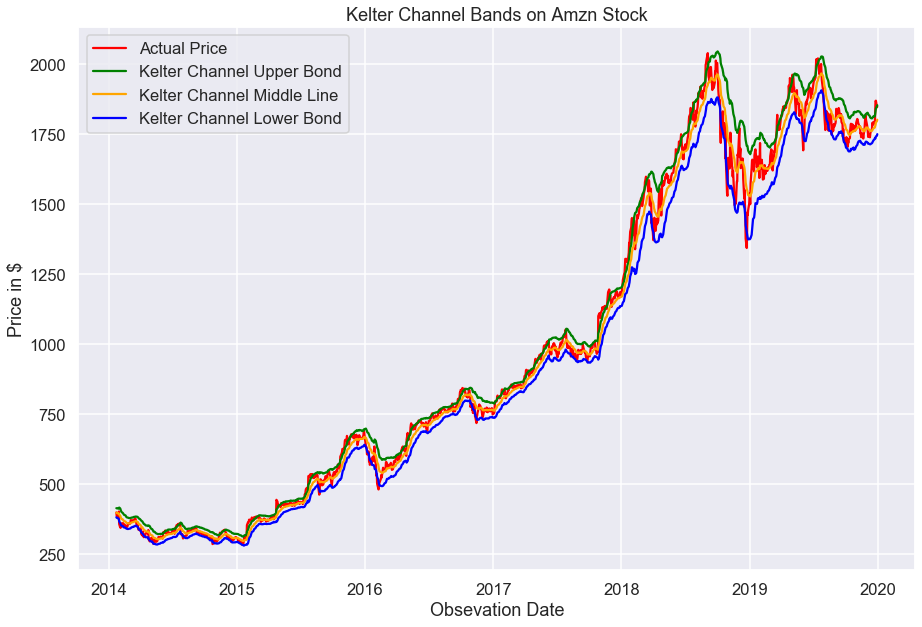

In [37]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(amzn_df.index, amzn_df['Close'], label='Actual Price', color = 'red')
ax.plot(amzn_df.index, amzn_df['Upper bond'], label = 'Kelter Channel Upper Bond', color = 'green')
ax.plot(amzn_df.index, amzn_df['ema20'], label = 'Kelter Channel Middle Line', color = 'orange')
ax.plot(amzn_df.index, amzn_df['Lower bond'], label = 'Kelter Channel Lower Bond', color = 'blue')

ax.legend(loc='best')
ax.set_title('Kelter Channel Bands on Amzn Stock')
ax.set_xlabel('Obsevation Date')
ax.set_ylabel('Price in $')

Text(0, 0.5, 'Price in $')

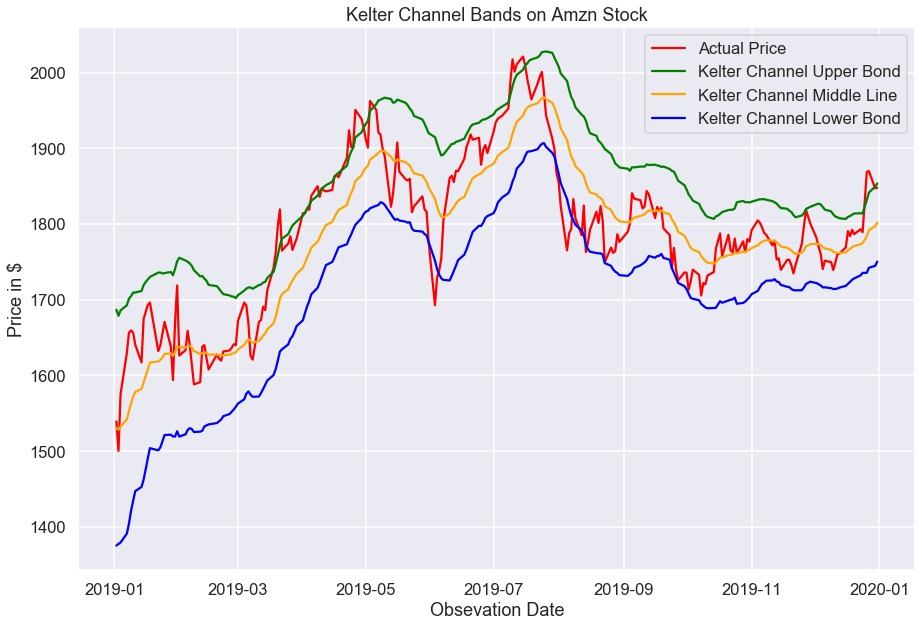

In [38]:
start_date = '2019-01-01'
end_date = '2020-01-01'

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(amzn_df.loc[start_date:end_date, :].index, amzn_df.loc[start_date:end_date,'Close'], label='Actual Price', color = 'red')
ax.plot(amzn_df.loc[start_date:end_date, :].index, amzn_df.loc[start_date:end_date,'Upper bond'], label = 'Kelter Channel Upper Bond', color = 'green')
ax.plot(amzn_df.loc[start_date:end_date, :].index, amzn_df.loc[start_date:end_date,'ema20'], label = 'Kelter Channel Middle Line', color = 'orange')
ax.plot(amzn_df.loc[start_date:end_date, :].index, amzn_df.loc[start_date:end_date,'Lower bond'], label = 'Kelter Channel Lower Bond', color = 'blue')

ax.legend(loc='best')
ax.set_title('Kelter Channel Bands on Amzn Stock')
ax.set_xlabel('Obsevation Date')
ax.set_ylabel('Price in $')

## Trading Strategy

Buy if actual actual close price cross Kelter Channel Upper Band from below. <br>
Sell if actual close price cross Kelter Channel Lower Band from above. <br>
Hold stocks during other time. <br>

In [40]:
for index, row in amzn_df.iterrows():
    if amzn_df.loc[index,'Close'] > amzn_df.loc[index,'Upper bond']:
        amzn_df.loc[index,'Signal'] = 1   
    elif amzn_df.loc[index,'Close'] < amzn_df.loc[index,'Lower bond']:
        amzn_df.loc[index,'Signal'] = -1   
    else:
        amzn_df.loc[index,'Signal'] = 0

In [45]:
amzn_df.tail(20)

,High,Low,Open,Close,Volume,Adj Close,ema20,ATR,Upper bond,Lower bond,Signal
Date,,,,,,,,,,,
2019-12-03,1772.869995,1747.229980,1760.000000,1769.959961,3380900,1769.959961,1773.585217,26.600113,1826.785443,1720.384992,0.0
2019-12-04,1789.089966,1760.219971,1774.010010,1760.689941,2670100,1760.689941,1772.357096,26.762247,1825.881590,1718.832601,0.0
2019-12-05,1763.500000,1740.000000,1763.500000,1740.479980,2823800,1740.479980,1769.321180,26.529230,1822.379639,1716.262721,0.0
2019-12-06,1754.400024,1740.130005,1751.199951,1751.599976,3117400,1751.599976,1767.633446,25.653572,1818.940589,1716.326303,0.0
2019-12-09,1766.890015,1745.609985,1750.660034,1749.510010,2442800,1749.510010,1765.907405,25.341176,1816.589756,1715.225053,0.0
2019-12-10,1750.670044,1735.000000,1747.400024,1739.209961,2514300,1739.209961,1763.364791,24.650381,1812.665552,1714.064030,0.0
2019-12-11,1750.000000,1735.709961,1741.670044,1748.719971,2097600,1748.719971,1761.970046,23.910356,1809.790759,1714.149334,0.0
2019-12-12,1764.000000,1745.439941,1750.000000,1760.329956,3095900,1760.329956,1761.813847,23.528192,1808.870231,1714.757463,0.0
2019-12-13,1768.989990,1755.000000,1765.000000,1760.939941,2745700,1760.939941,1761.730618,22.846892,1807.424402,1716.036834,0.0


In [42]:
amzn_df['Signal']=amzn_df['Signal'].shift(1)
amzn_df.head(20)

,High,Low,Open,Close,Volume,Adj Close,ema20,ATR,Upper bond,Lower bond,Signal
Date,,,,,,,,,,,
2014-01-23,406.170013,397.790009,401.000000,399.869995,3025400,399.869995,399.008553,8.098570,415.205692,382.811413,NaN
2014-01-24,400.200012,387.269989,398.160004,387.600006,4458400,387.600006,397.922024,8.443673,414.809371,381.034677,0.0
2014-01-27,394.100006,380.489990,390.500000,386.279999,3936800,386.279999,396.813260,8.812698,414.438656,379.187864,0.0
2014-01-28,394.739990,387.119995,387.399994,394.429993,2894500,394.429993,396.586282,8.787505,414.161291,379.011273,0.0
2014-01-29,392.850006,383.239990,392.160004,384.200012,3382300,384.200012,395.406637,8.959112,413.324861,377.488414,0.0
2014-01-30,406.250000,387.700012,393.769989,403.010010,10473900,403.010010,396.130768,9.894174,415.919116,376.342420,0.0
2014-01-31,375.450012,357.760010,371.760010,358.690002,16154800,358.690002,392.564981,12.419590,417.404161,367.725800,0.0
2014-02-03,360.850006,340.100006,358.980011,346.149994,10280800,346.149994,388.144506,13.014620,414.173745,362.115267,-1.0
2014-02-04,354.000000,344.019989,349.589996,347.950012,4812900,347.950012,384.316459,12.797862,409.912182,358.720735,-1.0


In [48]:
initial_amt = 100000
total_shares = 30
print('Account balance ',initial_amt)
print('Initial number of shares owned ',total_shares)
avg_price = 399.87
initial_val = 111996.1 #initial amount+total_shares*ini_price

for index, row in amzn_df.iterrows():
    if amzn_df.loc[index,'Signal'] == 1:
        if (initial_amt - amzn_df.loc[index,'Close'])> 0 :
            initial_amt -= amzn_df.loc[index,'Close']
            avg_price = ((avg_price*total_shares)+amzn_df.loc[index,'Close'])/(total_shares+1)
            total_shares = total_shares + 1;
            amzn_df.loc[index,'Action'] = "Buy"
        else:
            amzn_df.loc[index,'Action'] = "Buy Alert"         
    elif amzn_df.loc[index,'Signal'] == -1:
        if total_shares - 1 > 0 :
            amzn_df.loc[index,'Action'] = "Sell"
            avg_price = ((avg_price*total_shares)-amzn_df.loc[index,'Close'])/(total_shares-1)
            initial_amt += amzn_df.loc[index,'Close'];
            total_shares = total_shares - 1;
        else:
            amzn_df.loc[index,'Action'] = "Sell Alert"
    else:
        amzn_df.loc[index,'Action'] = "Hold"

print('----------------Signals Given During Day To Day Trade------------------------')

total_val = initial_amt + total_shares * 2034.33  
print(amzn_df.tail(20))

print('----------------Results-------------------------')
print('Balance left in Account',initial_amt)
print('Total Number of shares ',total_shares)
print('Total value of the shares ',total_val)
print('Percentage Profit ',((total_val-initial_val)/initial_val)*100)

Account balance  100000
Initial number of shares owned  30
----------------Signals Given During Day To Day Trade------------------------
                   High          Low         Open        Close   Volume  \
Date                                                                      
2019-12-03  1772.869995  1747.229980  1760.000000  1769.959961  3380900   
2019-12-04  1789.089966  1760.219971  1774.010010  1760.689941  2670100   
2019-12-05  1763.500000  1740.000000  1763.500000  1740.479980  2823800   
2019-12-06  1754.400024  1740.130005  1751.199951  1751.599976  3117400   
2019-12-09  1766.890015  1745.609985  1750.660034  1749.510010  2442800   
2019-12-10  1750.670044  1735.000000  1747.400024  1739.209961  2514300   
2019-12-11  1750.000000  1735.709961  1741.670044  1748.719971  2097600   
2019-12-12  1764.000000  1745.439941  1750.000000  1760.329956  3095900   
2019-12-13  1768.989990  1755.000000  1765.000000  1760.939941  2745700   
2019-12-16  1769.500000  1757.050049  

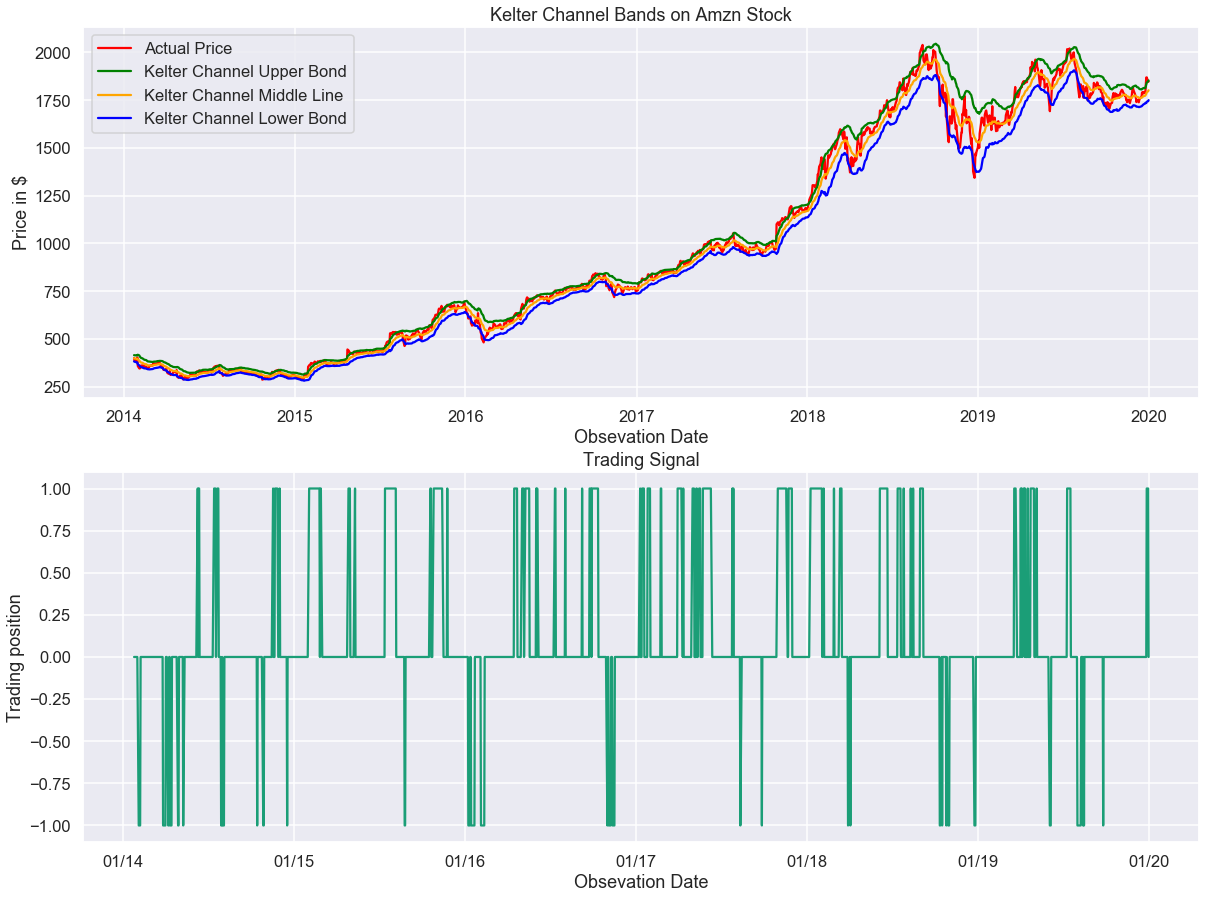

In [55]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,15))

ax1.plot(amzn_df.index, amzn_df['Close'], label='Actual Price', color = 'red')
ax1.plot(amzn_df.index, amzn_df['Upper bond'], label = 'Kelter Channel Upper Bond', color = 'green')
ax1.plot(amzn_df.index, amzn_df['ema20'], label = 'Kelter Channel Middle Line', color = 'orange')
ax1.plot(amzn_df.index, amzn_df['Lower bond'], label = 'Kelter Channel Lower Bond', color = 'blue')

ax1.legend(loc='best')
ax1.set_title('Kelter Channel Bands on Amzn Stock')
ax1.set_xlabel('Obsevation Date')
ax1.set_ylabel('Price in $')

ax2.plot(amzn_df.index, amzn_df['Signal'], label='Trading position')
ax2.set_title('Trading Signal')
ax2.set_xlabel('Obsevation Date')
ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)